In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [1]:
import pandas as pd

# Prepare lists to store the data
games_data = []
steps_data = []

with open('new.txt', 'r') as file:
    for line in file:
        parts = line.split()
        if line.startswith("Completed"):
            # Check if line has all expected parts
            if len(parts) < 11:
                continue
            # Parse completed games line
            games = int(parts[1].replace(',', ''))
            rewards = int(parts[3].replace(',', ''))
            frames = int(parts[5].replace(',', ''))
            score = int(parts[8].replace(',', ''))
            max_score = int(parts[11].replace('.', ''))
            
            games_data.append([games, rewards, frames, score, max_score])
        elif line.startswith("Step"):
            # Parse critic loss lines
            step = int(parts[1].replace(':', '').replace(',', ''))
            critic_loss = float(parts[4])

            steps_data.append([step, critic_loss])

# Convert lists into pandas DataFrames
games_df = pd.DataFrame(games_data, columns=['games', 'rewards', 'frames', 'score', 'max_score'])
steps_df = pd.DataFrame(steps_data, columns=['step', 'critic_loss'])

print(games_df)
print(steps_df)


      games  rewards   frames  score  max_score
0         0        2      591      1          1
1         1        3      772      0          1
2         2        5     1140      1          1
3         3        7     1562      1          1
4         4        8     1816      0          1
...     ...      ...      ...    ...        ...
7156   7156    13554  2877438    144        247
7157   7157    13630  2888924     75        247
7158   7158    13662  2894188     31        247
7159   7159    13936  2939320    273        273
7160   7160    13988  2947055     51        273

[7161 rows x 5 columns]
     step  critic_loss
0      50     0.411418
1     100     0.119526
2     150     0.200550
3     200     0.075117
4     250     0.448180
..    ...          ...
111  5600     4.654166
112  5650    12.309350
113  5700     1.790214
114  5750     5.151813
115  5800    10.121826

[116 rows x 2 columns]


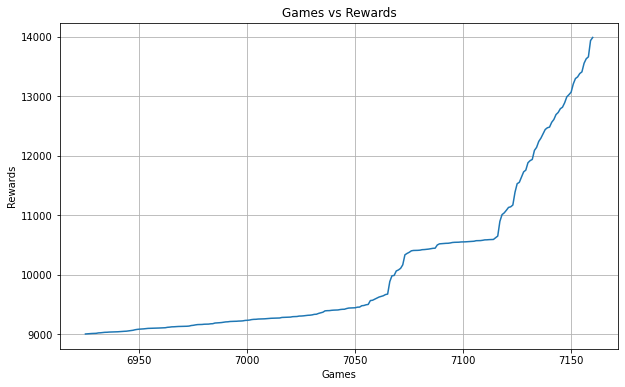

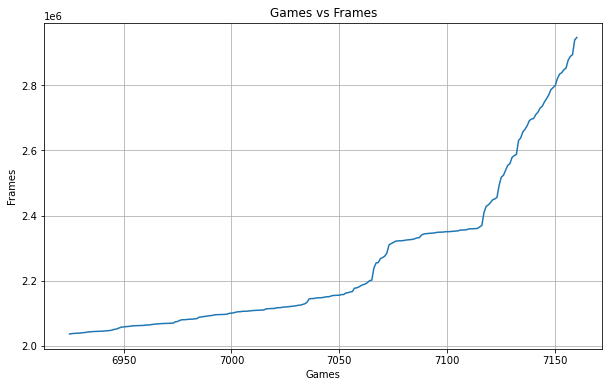

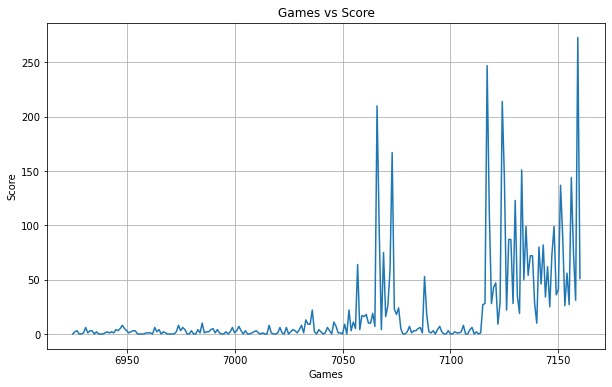

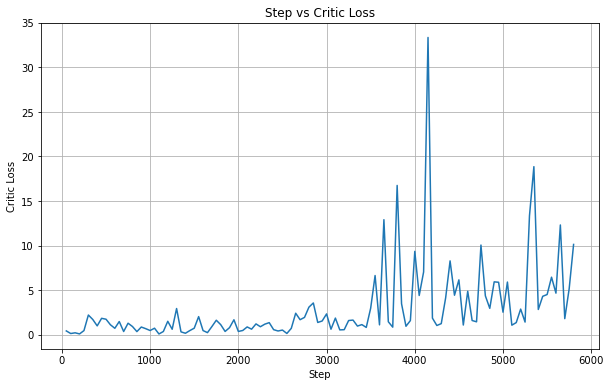

In [2]:
import matplotlib.pyplot as plt

# Filter out games with rewards smaller than 8000
filtered_game_data = games_df[games_df['rewards'] >= 9_000]

# Plot Games vs Rewards
plt.figure(figsize=(10, 6))
plt.plot(filtered_game_data['games'], filtered_game_data['rewards'])
plt.xlabel('Games')
plt.ylabel('Rewards')
plt.title('Games vs Rewards')
plt.grid(True)
plt.show()

# Plot Games vs Frames
plt.figure(figsize=(10, 6))
plt.plot(filtered_game_data['games'], filtered_game_data['frames'])
plt.xlabel('Games')
plt.ylabel('Frames')
plt.title('Games vs Frames')
plt.grid(True)
plt.show()

# Plot Games vs Score
plt.figure(figsize=(10, 6))
plt.plot(filtered_game_data['games'], filtered_game_data['score'])
plt.xlabel('Games')
plt.ylabel('Score')
plt.title('Games vs Score')
plt.grid(True)
plt.show()

# Plot Step vs Critic Loss
plt.figure(figsize=(10, 6))
plt.plot(steps_df['step'], steps_df['critic_loss'])
plt.xlabel('Step')
plt.ylabel('Critic Loss')
plt.title('Step vs Critic Loss')
plt.grid(True)
plt.show()

<ipython-input-13-9804fa0de843>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_game_data['score_expectation'] = filtered_game_data['score'].rolling(window=window_size).mean().rolling(window=window_size).mean()


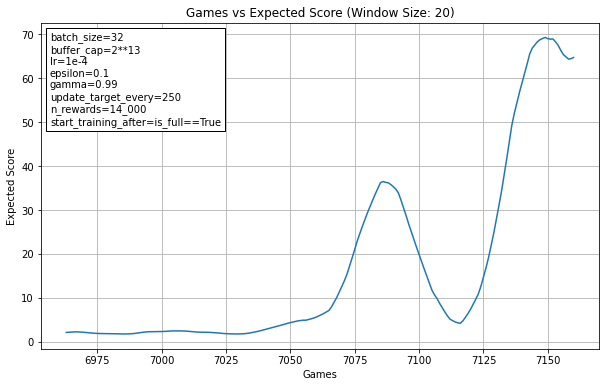

In [13]:
# Create a rolling window of length 20 and calculate the expected score in the window
from matplotlib.offsetbox import AnchoredText

window_size = 20
filtered_game_data['score_expectation'] = filtered_game_data['score'].rolling(window=window_size).mean().rolling(window=window_size).mean()

# Plot Games vs Expected Score
plt.figure(figsize=(10, 6))
plt.plot(filtered_game_data['games'], filtered_game_data['score_expectation'])
plt.xlabel('Games')
plt.ylabel('Expected Score')
plt.title(f'Games vs Expected Score (Window Size: {window_size})')

params = '\n'.join([
    f'batch_size=32',
    'buffer_cap=2**13',
    'lr=1e-4',
    'epsilon=0.1',
    'gamma=0.99',
    'update_target_every=250',
    'n_rewards=14_000',
    'start_training_after=is_full==True',
])

anchored_text = AnchoredText(params, loc=2)
plt.gca().add_artist(anchored_text)


plt.grid(True)
plt.show()




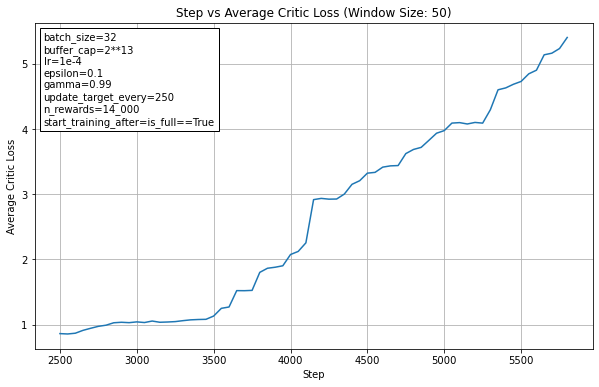

In [15]:
import matplotlib.pyplot as plt

# Create a rolling window of length 20 and calculate the average critic loss in the window
window_size = 50
steps_df['avg_critic_loss'] = steps_df['critic_loss'].rolling(window=window_size).mean()

# Plot Step vs Average Critic Loss
plt.figure(figsize=(10, 6))
plt.plot(steps_df['step'], steps_df['avg_critic_loss'])
plt.xlabel('Step')
plt.ylabel('Average Critic Loss')
plt.title(f'Step vs Average Critic Loss (Window Size: {window_size})')

params = '\n'.join([
    f'batch_size=32',
    'buffer_cap=2**13',
    'lr=1e-4',
    'epsilon=0.1',
    'gamma=0.99',
    'update_target_every=250',
    'n_rewards=14_000',
    'start_training_after=is_full==True'
])

anchored_text = AnchoredText(params, loc=2)
plt.gca().add_artist(anchored_text)

plt.grid(True)
plt.show()

In [16]:
filename = 'old.txt'

games_data = []
steps_data = []

with open(filename, 'r') as file:
    for line in file:
        line = line.strip()
        if line.startswith("Completed"):
            parts = line.split(',')
            games = int(parts[0].split()[-2])
            rewards = int(parts[1].split()[-2])
            frames = int(parts[2].split()[-2])
            score_idx = 3 if "score" in parts[3] else 4
            score = int(parts[score_idx].split()[-1])
            max_score = int(parts[-1].split()[-1])
            games_data.append([games, rewards, frames, score, max_score])
        elif line.startswith("Step") and "Epsilon updated" not in line:
            parts = line.split(',')
            step = int(parts[0].split()[-1])
            critic_loss = float(parts[1].split()[-1])
            steps_data.append([step, critic_loss])

# Convert lists into pandas DataFrames
games_df = pd.DataFrame(games_data, columns=['games', 'rewards', 'frames', 'score', 'max_score'])
steps_df = pd.DataFrame(steps_data, columns=['step', 'critic_loss'])

print(games_df)
print(steps_df)


       games  rewards   frames  score  max_score
0        787     1019   229789      0          4
1        788     1021   230172      1          4
2        789     1023   230609      1          4
3        790     1024   230863      0          4
4        791     1026   231368      1          4
...      ...      ...      ...    ...        ...
12411  13198    33422  8002436      1        482
12412  13199    33423  8002617      0        482
12413  13200    33426  8003829      2        482
12414  13201    33428  8004341      1        482
12415  13202    33429  8004522      0        482

[12416 rows x 5 columns]
      step   critic_loss
0       50     43.256184
1      100     59.075012
2      150     46.981869
3      200     27.544920
4      250     19.065830
..     ...           ...
499  25000  44097.250000
500  25050  19397.035156
501  25100  18551.839844
502  25150  16184.157227
503  25200  16974.429688

[504 rows x 2 columns]


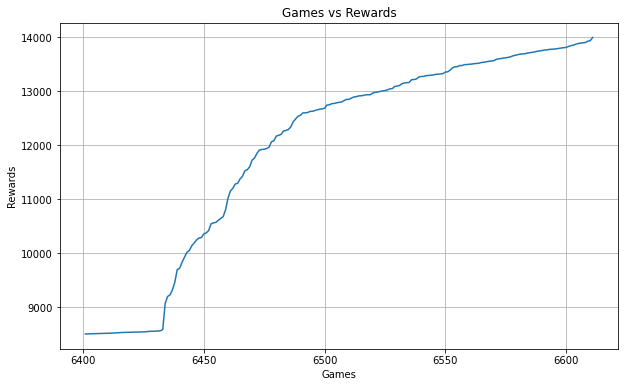

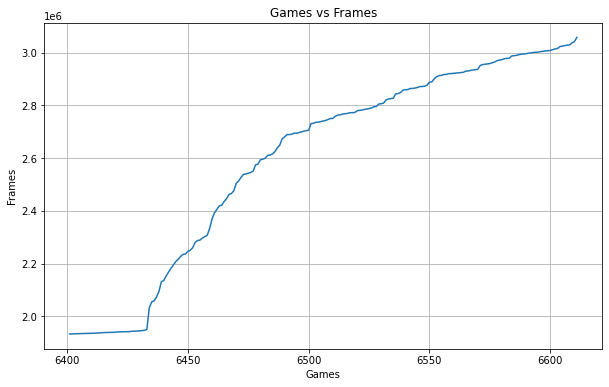

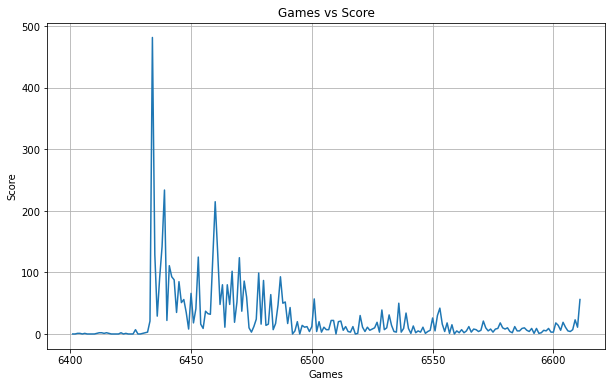

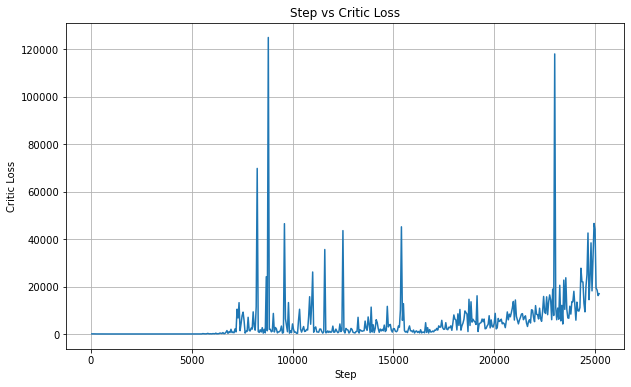

In [17]:
import matplotlib.pyplot as plt

# Filter out games with rewards smaller than 3000 and larger than 20000
filtered_game_data = games_df[(games_df['rewards'] >= 8500) & (games_df['rewards'] <= 14_000)]


# Plot Games vs Rewards
plt.figure(figsize=(10, 6))
plt.plot(filtered_game_data['games'], filtered_game_data['rewards'])
plt.xlabel('Games')
plt.ylabel('Rewards')
plt.title('Games vs Rewards')
plt.grid(True)
plt.show()

# Plot Games vs Frames
plt.figure(figsize=(10, 6))
plt.plot(filtered_game_data['games'], filtered_game_data['frames'])
plt.xlabel('Games')
plt.ylabel('Frames')
plt.title('Games vs Frames')
plt.grid(True)
plt.show()

# Plot Games vs Score
plt.figure(figsize=(10, 6))
plt.plot(filtered_game_data['games'], filtered_game_data['score'])
plt.xlabel('Games')
plt.ylabel('Score')
plt.title('Games vs Score')
plt.grid(True)
plt.show()

# Plot Step vs Critic Loss
plt.figure(figsize=(10, 6))
plt.plot(steps_df['step'], steps_df['critic_loss'])
plt.xlabel('Step')
plt.ylabel('Critic Loss')
plt.title('Step vs Critic Loss')
plt.grid(True)
plt.show()

<ipython-input-19-30af538d73e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_game_data['score_expectation'] = filtered_game_data['score'].rolling(window=window_size).mean().rolling(window=window_size).mean()


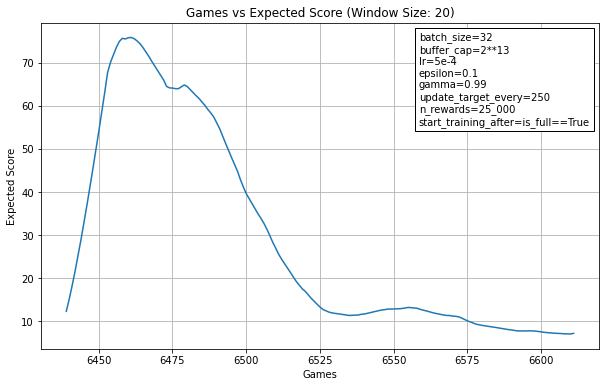

In [19]:
# Create a rolling window of length 20 and calculate the expected score in the window
window_size = 20
filtered_game_data['score_expectation'] = filtered_game_data['score'].rolling(window=window_size).mean().rolling(window=window_size).mean()

# Plot Games vs Expected Score
plt.figure(figsize=(10, 6))
plt.plot(filtered_game_data['games'], filtered_game_data['score_expectation'])
plt.xlabel('Games')
plt.ylabel('Expected Score')
plt.title(f'Games vs Expected Score (Window Size: {window_size})')

params = '\n'.join([
    f'batch_size=32',
    'buffer_cap=2**13',
    'lr=5e-4',
    'epsilon=0.1',
    'gamma=0.99',
    'update_target_every=250',
    'n_rewards=25_000',
    'start_training_after=is_full==True'
])

anchored_text = AnchoredText(params, loc=1)
plt.gca().add_artist(anchored_text)

plt.grid(True)
plt.show()


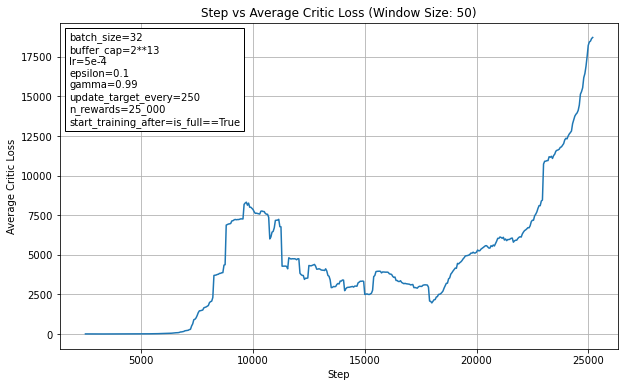

In [21]:
import matplotlib.pyplot as plt

# Create a rolling window of length 20 and calculate the average critic loss in the window
window_size = 50
steps_df['avg_critic_loss'] = steps_df['critic_loss'].rolling(window=window_size).mean()

# Plot Step vs Average Critic Loss
plt.figure(figsize=(10, 6))
plt.plot(steps_df['step'], steps_df['avg_critic_loss'])
plt.xlabel('Step')
plt.ylabel('Average Critic Loss')
plt.title(f'Step vs Average Critic Loss (Window Size: {window_size})')

params = '\n'.join([
    f'batch_size=32',
    'buffer_cap=2**13',
    'lr=5e-4',
    'epsilon=0.1',
    'gamma=0.99',
    'update_target_every=250',
    'n_rewards=25_000',
    'start_training_after=is_full==True'
])

anchored_text = AnchoredText(params, loc=2)
plt.gca().add_artist(anchored_text)

plt.grid(True)
plt.show()
